In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

In [2]:
# Karplus-Strong algorithm
def KS_embedding(x, alpha=1, n_periods=100):
    y = x.copy()
    for ind in range(1, n_periods):
        y = np.append(y, (alpha**ind) * x)
    return y

1ST PART

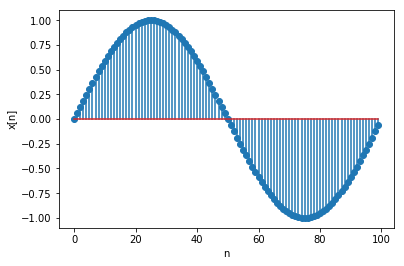

In [3]:
# Create a base oscillating signal
N = 100 # number of samples before repeating the signal
n = np.linspace(0, N-1, N)
x = np.sin(2*np.pi * n / N)

# and plot it
plt.stem(n, x, use_line_collection='True')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

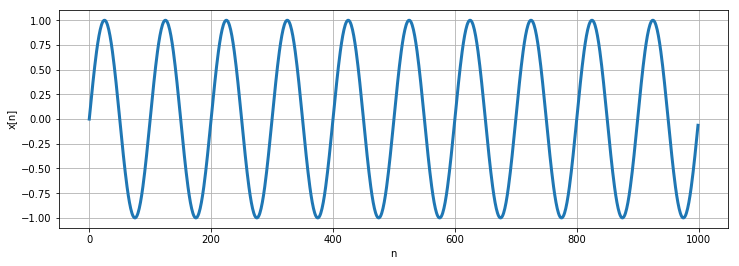

In [4]:
# Repeat signal with Karplus-Strong Algorithm
y = KS_embedding(x, alpha=1, n_periods=10)

# and plot it
plt.figure(figsize=(12, 4))
plt.plot(y, linewidth=3)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('True')
plt.show()

In [5]:
# Create a longer signal with Karplus-Strong Algorithm
y = KS_embedding(x, alpha=1, n_periods=1000)
print(len(y))

100000


In [6]:
# Set sampling rate for the internal machine clock (needed to play)
Fs = 44000 # 44 KHz
# Ts = 1/Fs

In [7]:
# Test your audio signal
# 1) Fs=44,000 sps --> 100,000/44,000 = 2.27s
# 2) f=1/(N*Ts) = 44,000/100 = 440Hz --> A4 (physical frequency)
IPython.display.Audio(y, rate=Fs)

In [8]:
# Test 2: sampling rate at half
# == Q1 ¿Cuál es la relación de este sonido respecto del anterior en términos de frecuencia y duración?
# == Q2 ¿Por qué cambian su duración y frecuencia respecto al sonido anterior?
IPython.display.Audio(y, rate=Fs / 2)

In [9]:
# Test 3: sampling rate at double
# == Q3 ¿Cuál es la relación de este sonido respecto del primero en términos de frecuencia y duración?
IPython.display.Audio(y, rate=Fs * 2)

2ND PART

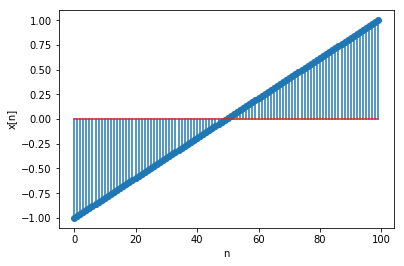

In [10]:
# New base signal (random)
x = np.linspace(-1, 1, 100)

# and plot it
plt.stem(n, x, use_line_collection='True')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

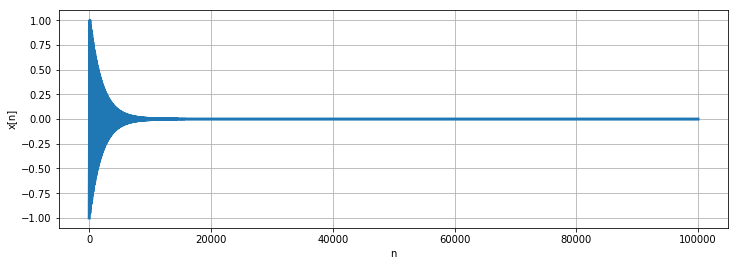

In [11]:
# Repeat signal with Karplus-Strong Algorithm
y = KS_embedding(x, alpha=0.95, n_periods=1000)

# and plot it
plt.figure(figsize=(12, 4))
plt.plot(y, linewidth=3)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('True')
plt.show()

# == Q4 ¿Qué significa la forma de esta señal?

In [12]:
# Test your signal
IPython.display.Audio(y, rate=Fs)

In [13]:
# == Q5 ¿Cuál es la duración de esta señal y cómo lo calculaste?
# == Q6 Dada la duración y frecuencia de oscilación de la señal anterior, ¿a qué nota musical corresponde?

3RD PART

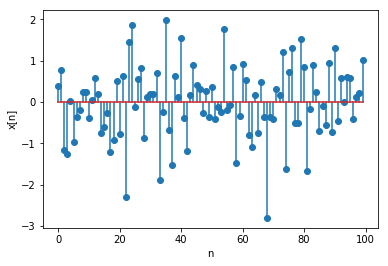

In [14]:
# New base signal (random)
x = np.random.randn(100)

# and plot it
plt.stem(n, x, use_line_collection='True')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

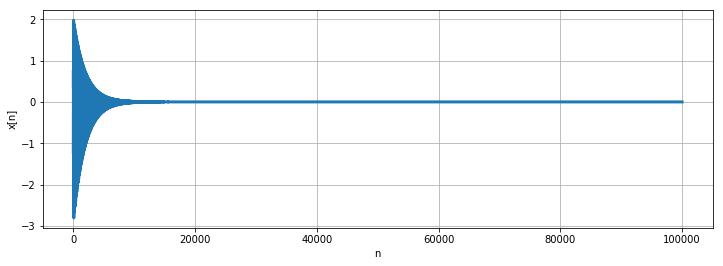

In [15]:
# Repeat signal with Karplus-Strong Algorithm
y = KS_embedding(x, alpha=0.95, n_periods=1000)

# and plot it
plt.figure(figsize=(12, 4))
plt.plot(y, linewidth=3)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('True')
plt.show()

In [16]:
# Test your signal
IPython.display.Audio(y, rate=Fs)

4TH PART

In [17]:
# Q7 Investiga cuál es la frecuencia de muestreo estandar para el DVD (audio) y úsala para el siguiente ejercicio
# Se pueden utilizar frecuencias de muestreo de 48 o 96 KHz con cuantificaciones de hasta 24 bits
Fs = 48000


In [18]:
def freq(note):
    """ Convert a note in standard English notation into its frequency value (Hz)
    IN: note in standard English notation, e.g., A4
    OUT: frequency value, e.g, 440 Hz
    """
    if len(note) < 2 or len(note) > 3 or note[0] < 'A' or note[0] > 'G':
        return 0
    if len(note) == 3:
        if note[1] == 'b':
            acc = -1
        elif note[1] == '#':
            acc = 1
        else:
            return 0
        octave = int(note[2])
    else:
        acc = 0
        octave = int(note[1])
    TONES = {'A': 0, 'B': 2, 'C': -9, 'D': -7, 'E': -5, 'F': -4, 'G': -2}
    n = 12 * (octave - 4) + TONES[note[0]] + acc
    f = 440 * (2 ** (float(n) / 12.0))
    return f

In [103]:
def get_KS(note):
    """ Given a note in standard English notation, generates a random seed and then a K-S sequence"""
    f0 = freq(note)
    x = np.random.randn(int(np.round(float(Fs) / f0)))
    p = int(np.round(20000/len(x)))
    return KS_embedding(x, alpha=0.95, n_periods=p)

# == Q8 ¿Cuál es la longitud de la secuencia 'x' de números aleatorios?
# == Q9 ¿Qué limitante encuentras en esta implementación respecto a su uso con frecuencias altas?

In [104]:
# == Q10 Encuentra la forma de que todas las notas de la siguiente melodia tengan la misma duración
# con la restricción de que su secuencia suene a canción.

In [105]:
def get_sound(note):
    """ Given a note in standard English notation, returns either an empty sequence for silence, or
    the K-S sequence representing a sound.
    """
    # Get sound for each
    if note == '--':
        sound = np.zeros((10000))
    else:
        sound = get_KS(note)
    
    return sound

In [106]:
# Define a sheet music
sheetmusic = ['--', 'G4', 'G4', 'G4', 'D4', 'G4', 'B4', 'A4', 'B4', '--', '--', 'G4', 'G4', 'D4', 'G4', 'B4', 'A4', '--']

In [107]:
# Concatena sonidos para crear una melodia
music = np.empty(0)
for note in sheetmusic:
    sound = get_sound(note)
    #print(f"Length for {note}: {sound.shape} samples.")
    music = np.append(music, sound)
    
print(len(music))

319994


In [108]:
# Play it
IPython.display.Audio(music, rate=Fs)

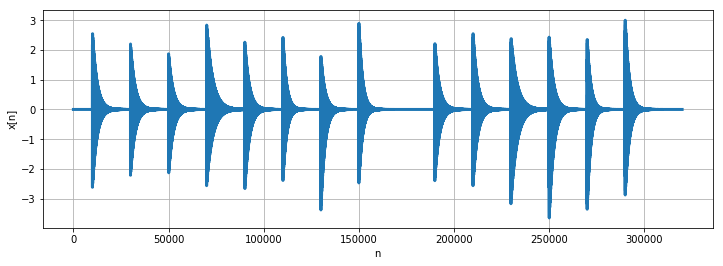

In [109]:
# and plot it
plt.figure(figsize=(12, 4))
plt.plot(music, linewidth=3)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid('True')
plt.show()